In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.patches as patches

# Defining functions

In [3]:
def eta(part, Dataset):
    if part == 1:
        teta = np.arccos(Dataset.pz_1/np.sqrt(Dataset.pz_1**2 + Dataset.py_1**2 + Dataset.px_1**2))
        return -np.log(np.tan(teta/2))
    if part == 2:
        teta = np.arccos(Dataset.pz_2/np.sqrt(Dataset.pz_2**2 + Dataset.py_2**2 + Dataset.px_2**2))
        return -np.log(np.tan(teta/2))
def get_inv_M2(Data):
    return (Data.E_1 + Data.E_2)**2 - (Data.px_1 + Data.px_2)**2 - (Data.py_1 + Data.py_2)**2 - (Data.pz_1 + Data.pz_2)**2
def eta_sum(Data):
    return eta(1,Data) + eta(2,Data)

def eta_right(Data):
    teta = np.arccos((Dataset.pz_1+Dataset.pz_2)/np.sqrt((Dataset.pz_1+Dataset.pz_2)**2 + (Dataset.py_1+Dataset.py_2)**2 + (Dataset.px_1+Dataset.px_2)**2))
    return -np.log(np.tan(teta/2))

def get_theta(Dataset):
    return (Dataset.pz_1*Dataset.pz_2 + Dataset.py_1*Dataset.py_2 + Dataset.px_1*Dataset.px_2)/(np.sqrt(Dataset.pz_1**2 + Dataset.py_1**2 + Dataset.px_1**2)*np.sqrt(Dataset.pz_2**2 + Dataset.py_2**2 + Dataset.px_2**2))
    
    
def get_pt(Dataset):
    return np.sqrt((Dataset.py_1 + Dataset.py_2)**2 + (Dataset.px_1 + Dataset.px_2)**2)

def get_plong(Dataset):
    return np.sqrt((Dataset.py_1 + Dataset.py_2)**2 + (Dataset.px_1 + Dataset.px_2)**2)

# Read  HNL dataset

In [3]:
FILE = open("HNLmerge_100k_D_0_300m_mupi_1GeV", "r")
Data = []
x = 1 
while x:
    x = FILE.readline().split()
    if len(x) == 0:
        continue
    if x[0] == "9900015":
        y = list(map(float, FILE.readline().split()[4:8]))
        z = [y[3]]
        z += y[:3]
        x = z[:]
        r = list(map(float, FILE.readline().split()[4:8]))
        t = [r[3]]
        t += r[:3]
        x += t[:]
        Data.append(x + ["HNL"])

Data = pd.DataFrame(Data)
Data.columns = ["E_1", "px_1", "py_1", "pz_1", "E_2", "px_2", "py_2", "pz_2", "id"]
Data

,E_1,px_1,py_1,pz_1,E_2,px_2,py_2,pz_2,id
0,31.434580,-0.291265,0.965718,31.418085,0.729318,-0.111851,0.020200,0.712616,HNL
1,12.284244,0.614518,-0.239186,12.265738,16.723256,-0.254926,-0.609963,16.709851,HNL
2,4.254123,0.161643,-0.127234,4.246854,39.123328,-1.131327,-0.537256,39.103132,HNL
3,1.332030,-0.334680,-0.434859,1.205700,2.821363,-0.283244,0.391692,2.777638,HNL
4,4.058545,0.795627,0.274314,3.967876,1.630614,0.135133,0.681227,1.471532,HNL
...,...,...,...,...,...,...,...,...,...
99995,5.222511,0.128808,0.198249,5.215290,3.932970,-0.092639,0.960658,3.811252,HNL
99996,6.346971,-0.606489,0.183715,6.313714,11.636155,0.182683,0.190974,11.632674,HNL
99997,0.654646,-0.086205,-0.029794,0.633058,26.079180,-0.890348,-1.979448,25.988488,HNL
99998,12.048588,0.173734,0.738515,12.023867,6.943192,-0.378040,-0.133290,6.930805,HNL


# Read neutrino dataset

In [5]:
FILE_nu = open("data/SHIP_mu_100k_CC_finalstate", "r")
Data_nu = []
x = list(map(float, FILE_nu.readline().split()))
y = [1]
i = 0
while x:
    if len(x) == 0:
        continue
    if x[0] == -8888:
        x = list(map(float, FILE_nu.readline().split()))
        while y:
            y = list(map(float, FILE_nu.readline().split()))
            #print(y)
            if len(y) == 0:
                print("!!!!!")
                x = y[:]
                break
            if y[0] == -8888:
                x = y[:]
                if i > 5000 and i%5000 == 0:
                    print(i, "...")
                i+=1
                break
            if y[0] == 211:
                Data_nu.append(x[1:] + y[1:] + ["nu"])
                
        
            
Data_nu = pd.DataFrame(Data_nu)
#Data_nu
Data_nu.columns = ["E_1", "px_1", "py_1", "pz_1", "E_2", "px_2", "py_2", "pz_2", "id"]
Data_nu

10000 ...
15000 ...
20000 ...
25000 ...
30000 ...
35000 ...
40000 ...
45000 ...
50000 ...
55000 ...
60000 ...
65000 ...
70000 ...
75000 ...
!!!!!


,E_1,px_1,py_1,pz_1,E_2,px_2,py_2,pz_2,id
0,4.37617,-0.394796,1.410300,4.12249,6.257750,-0.219931,-0.515763,6.231010,nu
1,4.37617,-0.394796,1.410300,4.12249,0.744392,-0.099678,0.232037,0.686194,nu
2,45.21390,0.299403,-1.382280,45.19170,3.505510,-0.126249,0.150042,3.497240,nu
3,45.21390,0.299403,-1.382280,45.19170,0.378442,-0.058496,-0.333026,0.097007,nu
4,45.21390,0.299403,-1.382280,45.19170,0.186595,0.029935,-0.117665,-0.024431,nu
...,...,...,...,...,...,...,...,...,...
141410,37.27270,-2.355800,-1.317210,37.17470,2.312100,0.049016,0.222106,2.296650,nu
141411,37.27270,-2.355800,-1.317210,37.17470,0.909302,0.294817,0.270645,0.804478,nu
141412,66.14700,0.303266,-0.215697,66.14590,0.151195,-0.052750,0.020617,0.013132,nu
141413,32.46230,-0.738456,2.064140,32.38800,2.208600,-0.001135,0.043700,2.203750,nu


# Acceptance 

In [6]:
import numpy as np
def add_rand_coord():
    z_bord = [0,500]
    x_bord = [-90, 90]
    y_bord = [-200, 200]
    z_point = z_bord[0] + np.random.rand()*(z_bord[1] - z_bord[0])
    x_point = np.random.normal(0, x_bord[1]/2)
    y_point = np.random.normal(0, y_bord[1]/2)
    return (x_point, y_point, z_point)

[]

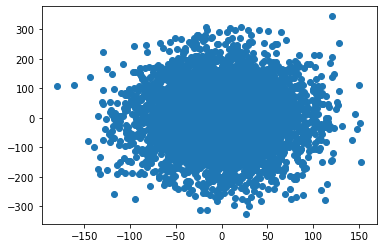

In [7]:
points_x = []
points_y = []

for i in range(5000):
    x, y = add_rand_coord()[0:2]
    points_x.append(x)
    points_y.append(y)
    
plt.scatter(points_x, points_y)
plt.plot()

In [8]:
Data_nu

,E_1,px_1,py_1,pz_1,E_2,px_2,py_2,pz_2,id
0,4.37617,-0.394796,1.410300,4.12249,6.257750,-0.219931,-0.515763,6.231010,nu
1,4.37617,-0.394796,1.410300,4.12249,0.744392,-0.099678,0.232037,0.686194,nu
2,45.21390,0.299403,-1.382280,45.19170,3.505510,-0.126249,0.150042,3.497240,nu
3,45.21390,0.299403,-1.382280,45.19170,0.378442,-0.058496,-0.333026,0.097007,nu
4,45.21390,0.299403,-1.382280,45.19170,0.186595,0.029935,-0.117665,-0.024431,nu
...,...,...,...,...,...,...,...,...,...
141410,37.27270,-2.355800,-1.317210,37.17470,2.312100,0.049016,0.222106,2.296650,nu
141411,37.27270,-2.355800,-1.317210,37.17470,0.909302,0.294817,0.270645,0.804478,nu
141412,66.14700,0.303266,-0.215697,66.14590,0.151195,-0.052750,0.020617,0.013132,nu
141413,32.46230,-0.738456,2.064140,32.38800,2.208600,-0.001135,0.043700,2.203750,nu


In [9]:
points = []
for i in range(len(Data_nu['E_1'])):
    points.append(add_rand_coord())
    
points = pd.DataFrame(points)
points.columns = ["x", "y", "z"]
points

,x,y,z
0,-105.813977,41.117825,332.011356
1,-72.816936,-56.125043,469.289957
2,64.485470,3.633273,56.003215
3,-14.454953,-45.348442,191.205540
4,-120.415569,61.928174,203.484527
...,...,...,...
141410,23.866594,6.309877,447.382349
141411,-69.443210,24.595985,36.396309
141412,46.410207,145.734137,3.290914
141413,18.626802,-12.823500,476.615208


In [10]:
Data_nu_coord = Data_nu.join(points)

In [11]:
Data_nu_coord

,E_1,px_1,py_1,pz_1,E_2,px_2,py_2,pz_2,id,x,y,z
0,4.37617,-0.394796,1.410300,4.12249,6.257750,-0.219931,-0.515763,6.231010,nu,-105.813977,41.117825,332.011356
1,4.37617,-0.394796,1.410300,4.12249,0.744392,-0.099678,0.232037,0.686194,nu,-72.816936,-56.125043,469.289957
2,45.21390,0.299403,-1.382280,45.19170,3.505510,-0.126249,0.150042,3.497240,nu,64.485470,3.633273,56.003215
3,45.21390,0.299403,-1.382280,45.19170,0.378442,-0.058496,-0.333026,0.097007,nu,-14.454953,-45.348442,191.205540
4,45.21390,0.299403,-1.382280,45.19170,0.186595,0.029935,-0.117665,-0.024431,nu,-120.415569,61.928174,203.484527
...,...,...,...,...,...,...,...,...,...,...,...,...
141410,37.27270,-2.355800,-1.317210,37.17470,2.312100,0.049016,0.222106,2.296650,nu,23.866594,6.309877,447.382349
141411,37.27270,-2.355800,-1.317210,37.17470,0.909302,0.294817,0.270645,0.804478,nu,-69.443210,24.595985,36.396309
141412,66.14700,0.303266,-0.215697,66.14590,0.151195,-0.052750,0.020617,0.013132,nu,46.410207,145.734137,3.290914
141413,32.46230,-0.738456,2.064140,32.38800,2.208600,-0.001135,0.043700,2.203750,nu,18.626802,-12.823500,476.615208


In [12]:
def check_acceptance(Dataset, L, X, Y):
    px1, px2, py1, py2, pz1, pz2 = (Dataset['px_1'], Dataset['px_2'], Dataset['py_1'],Dataset['py_2'] ,Dataset['pz_1'], Dataset['pz_2'])
    vec = Dataset[["x", "y", "z"]]
    Rx1 = ((pd.Series([L]*len(px1)) + vec["z"])*px1/pz1 + vec["x"]).abs()
    Rx2 = ((pd.Series([L]*len(px1)) + vec["z"])*px2/pz2 + vec["x"]).abs()
    Ry1 = ((pd.Series([L]*len(px1)) + vec["z"])*py1/pz1 + vec["y"]).abs()
    Ry2 = ((pd.Series([L]*len(px1)) + vec["z"])*py2/pz2 + vec["y"]).abs()
    X_max = pd.Series([X]*len(px1))
    Y_max = pd.Series([Y]*len(px1))
    Dataset["accp"] = (((Rx1 < X_max) & (Ry1 < Y_max)) & ((Rx2 < X_max) & (Ry2 < Y_max))) & ((vec['x'].abs() < pd.Series([90]*len(px1))) & vec['y'].abs() < (pd.Series([200]*len(px1)))) 
    #Dataset["accp_2"] = (Rx2 < X_max) & (Ry2 < Y_max)

In [13]:
check_acceptance(Data_nu_coord, 5000, 200, 450)
Data_nu_coord.loc[Data_nu_coord['accp'] == True]
print(len(Data_nu_coord.loc[Data_nu_coord['accp'] == True])/len(Data_nu_coord))

0.03445179082841283


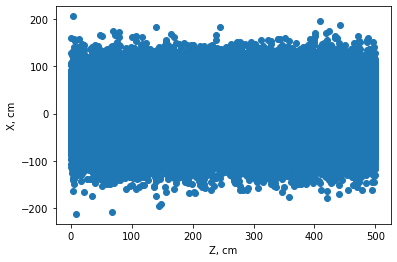

In [14]:
plt.scatter(Data_nu_coord['z'], Data_nu_coord['x'])
plt.xlabel("Z, cm")
plt.ylabel("X, cm")
plt.show()

[]

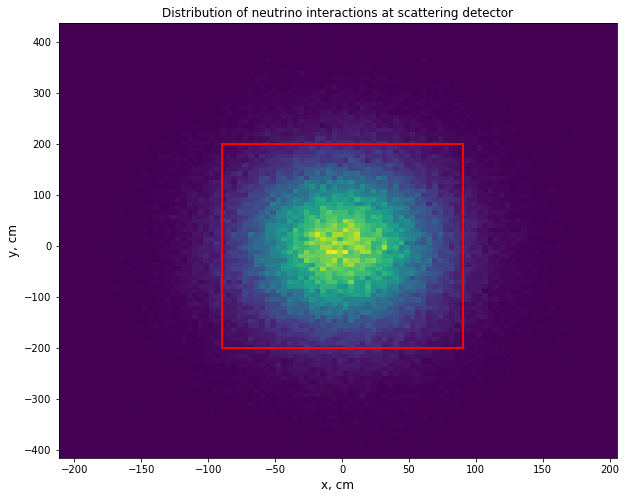

In [15]:
fig, ax = plt.subplots(figsize=(10,8))
x_bord = [-90, 90]
y_bord = [-200, 200]
ax.hist2d(Data_nu_coord['x'], Data_nu_coord['y'], bins = (100,100))
border = patches.Rectangle((-90,-200), 180, 400, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(border)
ax.set_title('Distribution of neutrino interactions at scattering detector')
ax.set_xlabel("x, cm", fontsize = 12)
ax.set_ylabel("y, cm", fontsize = 12)
plt.plot()

# HNL with acceptance

In [16]:
Data_hnl = pd.read_csv("data/HNLmerge_new_geom_1m_2", sep = "\t", header = None)
Data_hnl.columns = ["pdg_1", "E_1", "px_1", "py_1", "pz_1", "pdg_2", "E_2", "px_2", "py_2", "pz_2", "id", "x", "y", "z"]
#Data_hnl.columns = ["E_1", "px_1", "py_1", "pz_1", "E_2", "px_2", "py_2", "pz_2", "id", "x", "y", "z"]
Data_hnl

,pdg_1,E_1,px_1,py_1,pz_1,pdg_2,E_2,px_2,py_2,pz_2,id,x,y,z
0,-13,28.321331,0.148005,0.344902,28.318647,-211,83.469946,0.596514,-0.631144,83.465311,HNL,43.622877,-16.771474,-678.854590
1,-13,44.955267,-0.630604,0.310522,44.949645,-211,76.981278,-0.090230,-0.260910,76.980654,HNL,-28.464270,1.959095,-2413.719366
2,13,44.347566,0.021413,-0.364280,44.345942,211,17.852881,0.201937,0.429141,17.846035,HNL,18.229377,5.293798,-2152.510875
3,-13,14.096887,-0.227362,-0.257185,14.092310,-211,29.501140,0.629378,0.321313,29.492344,HNL,65.496945,10.447902,-127.630903
4,13,52.146763,0.799730,0.005000,52.140522,211,11.867133,0.163929,0.448500,11.856700,HNL,56.819704,26.739432,-3455.068288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37001,13,49.050112,-0.200106,-0.981038,49.039778,211,45.873648,0.593501,-0.399907,45.867852,HNL,21.926976,-76.970854,-1938.554291
37002,-13,39.138881,0.432716,0.285396,39.135304,-211,19.019408,-0.436748,-0.035332,19.013847,HNL,-0.513380,31.840219,175.517576
37003,13,33.647233,0.476012,0.288951,33.642459,211,14.281467,-0.272042,-0.283775,14.275373,HNL,23.368239,0.593001,-1738.703527
37004,-13,31.559252,0.278126,-0.655148,31.551049,-211,6.197653,-0.306503,0.071293,6.188085,HNL,-5.032896,-103.548022,-535.376341


In [53]:
# For mumunu case. Not implemented. Don't use this cell
Data_hnl = pd.read_csv("HNLmerge_new_geom_mumunu", sep = "\t", header = None)
Data_hnl.columns = ["pdg_1", "E_1", "px_1", "py_1", "pz_1", "pdg_2", "E_2", "px_2", "py_2", "pz_2", "id", "x", "y", "z"]
Data_hnl = Data_hnl.loc[(np.abs(Data_hnl.pdg_1) == 13) & (np.abs(Data_hnl.pdg_2) == 13)]
Data_hnl

,pdg_1,E_1,px_1,py_1,pz_1,pdg_2,E_2,px_2,py_2,pz_2,id,x,y,z
0,13,15.166214,-0.044907,-0.135581,15.165173,-13,19.446702,0.339923,-0.382939,19.439673,HNL,54.033144,-42.099190,-1209.733901
1,13,7.402729,0.284698,0.117579,7.395563,-13,7.619658,-0.285038,-0.106075,7.612852,HNL,105.984180,117.850440,1087.010572
2,13,4.949573,0.205971,0.060876,4.943782,-13,11.979862,-0.271946,-0.063164,11.976143,HNL,-4.518244,26.019488,-730.749791
3,13,7.203795,0.103082,0.031090,7.202216,-13,17.803470,-0.430255,-0.505856,17.790767,HNL,-30.803781,-128.356718,381.335603
4,-13,23.034483,-0.040705,-0.148704,23.033725,13,42.248389,-1.080122,0.029769,42.234437,HNL,-145.796962,-22.516591,1590.294846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2697,-13,5.603673,-0.073775,0.149743,5.600190,13,5.036403,-0.130171,-0.165898,5.030877,HNL,-34.434984,30.617207,-1126.667858
2698,-13,11.832532,-0.223559,0.072567,11.829725,13,10.377630,0.040914,0.201266,10.375060,HNL,-124.048819,77.880719,-799.241314
2699,-13,20.770657,-0.401735,-0.857102,20.748807,13,12.210617,0.332882,-0.281868,12.202367,HNL,-29.336646,-220.786453,95.444177
2700,-13,12.858309,0.307308,0.014352,12.854194,13,9.965656,-0.109785,0.211065,9.962255,HNL,83.702644,208.423564,1129.048834


In [17]:
# choose HNL inside the tau detector
z_borders = [-3418, -3418 + 500]
x_borders = [-90, 90]
y_borders = [-200, 200]

#Data_hnl.loc[((Data_hnl.x < x_borders[1]) & (Data_hnl.x > x_borders[0]))]
Data_hnl_cut = Data_hnl.loc[((Data_hnl.x < x_borders[1]) & (Data_hnl.x > x_borders[0])) & \
             ((Data_hnl.y < y_borders[1]) & (Data_hnl.y > y_borders[0])) & \
             ((Data_hnl.z < z_borders[1]) & (Data_hnl.z > z_borders[0]))]

In [18]:
columns = ["E_1", "px_1", "py_1", "pz_1", "E_2", "px_2", "py_2", "pz_2", "id"]
Data_nu_coord.loc[Data_nu_coord['accp'] == True][columns]

,E_1,px_1,py_1,pz_1,E_2,px_2,py_2,pz_2,id
2,45.2139,0.299403,-1.38228,45.1917,3.50551,-0.126249,0.150042,3.49724,nu
17,95.6665,-2.391220,2.56125,95.6023,1.15478,0.022270,-0.043948,1.14526,nu
82,48.0151,0.185770,-1.80991,47.9805,18.83680,-0.352816,1.269380,18.79020,nu
124,54.9917,1.627420,3.00099,54.8855,8.85459,-0.423007,-0.249035,8.83987,nu
147,67.6811,-1.956140,2.15321,67.6184,6.54626,0.084464,-0.556702,6.52051,nu
...,...,...,...,...,...,...,...,...,...
141349,20.8110,0.475901,1.29745,20.7648,17.77470,-0.067504,-0.277208,17.77190,nu
141350,20.8110,0.475901,1.29745,20.7648,10.18300,-0.122513,0.306683,10.17670,nu
141389,81.3883,1.432470,1.37055,81.3640,3.05351,0.051026,-0.075855,3.04894,nu
141396,25.4775,-0.283166,-1.89278,25.4053,7.92328,-0.144075,0.452662,7.90779,nu


In [19]:
Dataset = pd.concat([Data_hnl_cut[columns], Data_nu_coord.loc[Data_nu_coord['accp'] == True][columns]])
Dataset

,E_1,px_1,py_1,pz_1,E_2,px_2,py_2,pz_2,id
9,44.346717,-0.011502,-1.111183,44.332667,25.688950,-0.703776,-0.871831,25.664125,HNL
22,25.475918,0.587014,0.121414,25.468645,16.538551,-0.342444,0.364489,16.530399,HNL
51,17.371501,0.522947,-0.090460,17.363070,12.043281,-0.422036,0.115072,12.034524,HNL
76,20.096700,0.006916,-0.593415,20.087658,3.121020,0.114092,0.251099,3.105675,HNL
80,24.273382,0.428886,-0.740436,24.258065,37.778197,0.714650,0.055769,37.771137,HNL
...,...,...,...,...,...,...,...,...,...
141349,20.811000,0.475901,1.297450,20.764800,17.774700,-0.067504,-0.277208,17.771900,nu
141350,20.811000,0.475901,1.297450,20.764800,10.183000,-0.122513,0.306683,10.176700,nu
141389,81.388300,1.432470,1.370550,81.364000,3.053510,0.051026,-0.075855,3.048940,nu
141396,25.477500,-0.283166,-1.892780,25.405300,7.923280,-0.144075,0.452662,7.907790,nu


In [52]:
Dataset.loc[Dataset.id == 'HNL']
Data_hnl

,pdg_1,E_1,px_1,py_1,pz_1,pdg_2,E_2,px_2,py_2,pz_2,id,x,y,z
0,13,15.166214,-0.044907,-0.135581,15.165173,-13,19.446702,0.339923,-0.382939,19.439673,HNL,54.033144,-42.099190,-1209.733901
1,13,7.402729,0.284698,0.117579,7.395563,-13,7.619658,-0.285038,-0.106075,7.612852,HNL,105.984180,117.850440,1087.010572
2,13,4.949573,0.205971,0.060876,4.943782,-13,11.979862,-0.271946,-0.063164,11.976143,HNL,-4.518244,26.019488,-730.749791
3,13,7.203795,0.103082,0.031090,7.202216,-13,17.803470,-0.430255,-0.505856,17.790767,HNL,-30.803781,-128.356718,381.335603
4,-13,23.034483,-0.040705,-0.148704,23.033725,13,42.248389,-1.080122,0.029769,42.234437,HNL,-145.796962,-22.516591,1590.294846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2697,-13,5.603673,-0.073775,0.149743,5.600190,13,5.036403,-0.130171,-0.165898,5.030877,HNL,-34.434984,30.617207,-1126.667858
2698,-13,11.832532,-0.223559,0.072567,11.829725,13,10.377630,0.040914,0.201266,10.375060,HNL,-124.048819,77.880719,-799.241314
2699,-13,20.770657,-0.401735,-0.857102,20.748807,13,12.210617,0.332882,-0.281868,12.202367,HNL,-29.336646,-220.786453,95.444177
2700,-13,12.858309,0.307308,0.014352,12.854194,13,9.965656,-0.109785,0.211065,9.962255,HNL,83.702644,208.423564,1129.048834


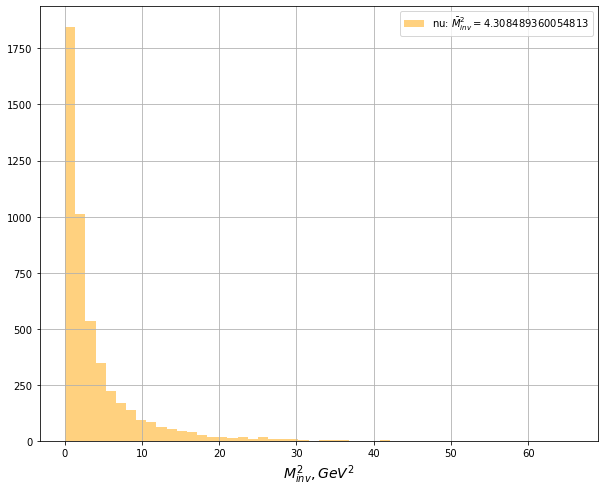

In [20]:
get_inv_M2(Dataset)
fig, ax = plt.subplots(figsize=(10,8))
plt.grid()
#ax.hist(get_inv_M2(Dataset.loc[Dataset.id == 'HNL']).to_numpy(), bins = 50, alpha = 0.5, 
#        label = "HNL: $\\bar{M}_{inv}^2 = $" + str(get_inv_M2(Dataset.loc[Dataset.id == 'HNL']).to_numpy().mean()) + ", " + str(len(get_inv_M2(Dataset.loc[Dataset.id == 'HNL']).to_numpy())))
ax.hist(get_inv_M2(Dataset.loc[Dataset.id == 'nu']).to_numpy(), bins = 50, alpha = 0.5, color = 'orange',
        label = "nu: $\\bar{M}_{inv}^2 = $" + str(get_inv_M2(Dataset.loc[Dataset.id == 'nu']).to_numpy().mean()))
#plt.hist((Dataset.E_1 + Dataset.E_2).loc[Dataset.id == 'nu'].to_numpy(), bins = 50)
ax.set_xlabel("$M_{inv}^{2}, GeV^2$", fontsize = 14)
#ax.set_xlim((0,1))
#ax.set_xscale("log")
plt.legend()
plt.show()

# Defining  features

In [21]:
acos = np.arccos(get_theta(Dataset))
eta_1 = eta_sum(Dataset)
Pt = get_pt(Dataset)
eta_2 = eta_right(Dataset)
Pl = Dataset.pz_1 + Dataset.pz_2
DATA = pd.DataFrame(np.array([acos, eta_1, Pt, eta_2, Pl, Dataset.id]).T)
DATA.columns = ['angle', 'eta', 'pt', 'eta_sum', 'pl', 'id']
DATA

,angle,eta,pt,eta_sum,pl,id
0,0.028562,8.204541,2.108073,4.196049,69.996793,HNL
1,0.04704,8.633979,0.543982,5.039676,41.999044,HNL
2,0.066814,8.189327,0.103869,6.338688,29.397594,HNL
3,0.115996,7.331676,0.363074,4.850221,23.193333,HNL
4,0.032009,8.695774,1.332833,4.533561,62.029203,HNL
...,...,...,...,...,...,...
7298,0.082426,8.229011,1.098946,4.25061,38.5367,nu
7299,0.047537,7.525419,1.642597,3.629671,30.9415,nu
7300,0.04172,8.608324,1.969009,4.451474,84.41294,nu
7301,0.131722,6.786665,1.502157,3.792704,33.31309,nu


In [22]:
DATA.to_csv("data/Dataset.csv")

# Visualisation

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
plt.grid()
plt.hist((Dataset.E_1 + Dataset.E_2).loc[Dataset.id == 'HNL'].to_numpy(), bins = 50)
plt.hist((Dataset.E_1 + Dataset.E_2).loc[Dataset.id == 'nu'].to_numpy(), bins = 50)
plt.xlabel("E")
plt.show()

In [ ]:
plt.figure(figsize = (12,8))
plt.grid()
plt.hist(eta_sum(Dataset.loc[Dataset.id == 'HNL']).to_numpy(), bins = 50, alpha = 0.5)
plt.hist(eta_sum(Dataset.loc[Dataset.id == 'nu']).to_numpy(), bins = 50, alpha = 0.5)
#plt.hist((Dataset.E_1 + Dataset.E_2).loc[Dataset.id == 'nu'].to_numpy(), bins = 50)
plt.xlabel("$\eta$")
plt.show()

In [ ]:
plt.figure(figsize = (12,8))
plt.grid()
plt.hist(get_pt(Dataset.loc[Dataset.id == 'nu']).to_numpy(), 
         bins = np.logspace(np.log10(0.1),np.log10(1000), 100), label = 'nu')
plt.hist(get_pt(Dataset.loc[Dataset.id == 'HNL']).to_numpy(), 
         bins = np.logspace(np.log10(0.1),np.log10(1000), 100), label = 'HNL')
#plt.hist((Dataset.E_1 + Dataset.E_2).loc[Dataset.id == 'nu'].to_numpy(), bins = 50)
plt.xscale('log')
plt.xlabel("$P_T$")
plt.legend()
print('nu:',
      get_pt(Dataset.loc[Dataset.id == 'nu']).to_numpy().mean(), 
      'HNL:',
      get_pt(Dataset.loc[Dataset.id == 'HNL']).to_numpy().mean())
print('nu:',
      len(get_pt(Dataset.loc[Dataset.id == 'nu']).to_numpy()), 
      'HNL:',
      len(get_pt(Dataset.loc[Dataset.id == 'HNL']).to_numpy()))
plt.show()

In [ ]:
DATA_labeled = pd.concat([DATA, Dataset["id"].to_numpy()])
plt.figure(figsize = (12,8))
plt.grid()
plt.hist2d(DATA.E_sum, DATA.pt )
#plt.hist((Dataset.E_1 + Dataset.E_2).loc[Dataset.id == 'nu'].to_numpy(), bins = 50)
plt.xscale('log')
plt.xlabel("$P_T$")
plt.legend()
print('nu:',
      get_pt(Dataset.loc[Dataset.id == 'nu']).to_numpy().mean(), 
      'HNL:',
      get_pt(Dataset.loc[Dataset.id == 'HNL']).to_numpy().mean())
print('nu:',
      len(get_pt(Dataset.loc[Dataset.id == 'nu']).to_numpy()), 
      'HNL:',
      len(get_pt(Dataset.loc[Dataset.id == 'HNL']).to_numpy()))
plt.show()

In [ ]:
DATA

In [ ]:
Dataset["id"]

In [7]:
DATA['id'] = Dataset["id"].to_numpy()
DATA

,E_sum,eta,theta,pt,id
0,32.163898,4.100122,0.989306,1.065146,HNL
1,29.007501,4.140902,0.997725,0.922150,HNL
2,43.377452,4.300932,0.997629,1.175514,HNL
3,4.153393,2.560215,0.876469,0.619430,HNL
4,5.689159,2.113394,0.929264,1.333932,HNL
...,...,...,...,...,...
241410,39.584800,3.432291,0.987776,2.553528,nu
241411,38.182002,3.493221,0.861596,2.311482,nu
241412,66.298195,6.032450,0.220551,0.317513,nu
241413,34.670900,3.434087,0.998793,2.233828,nu


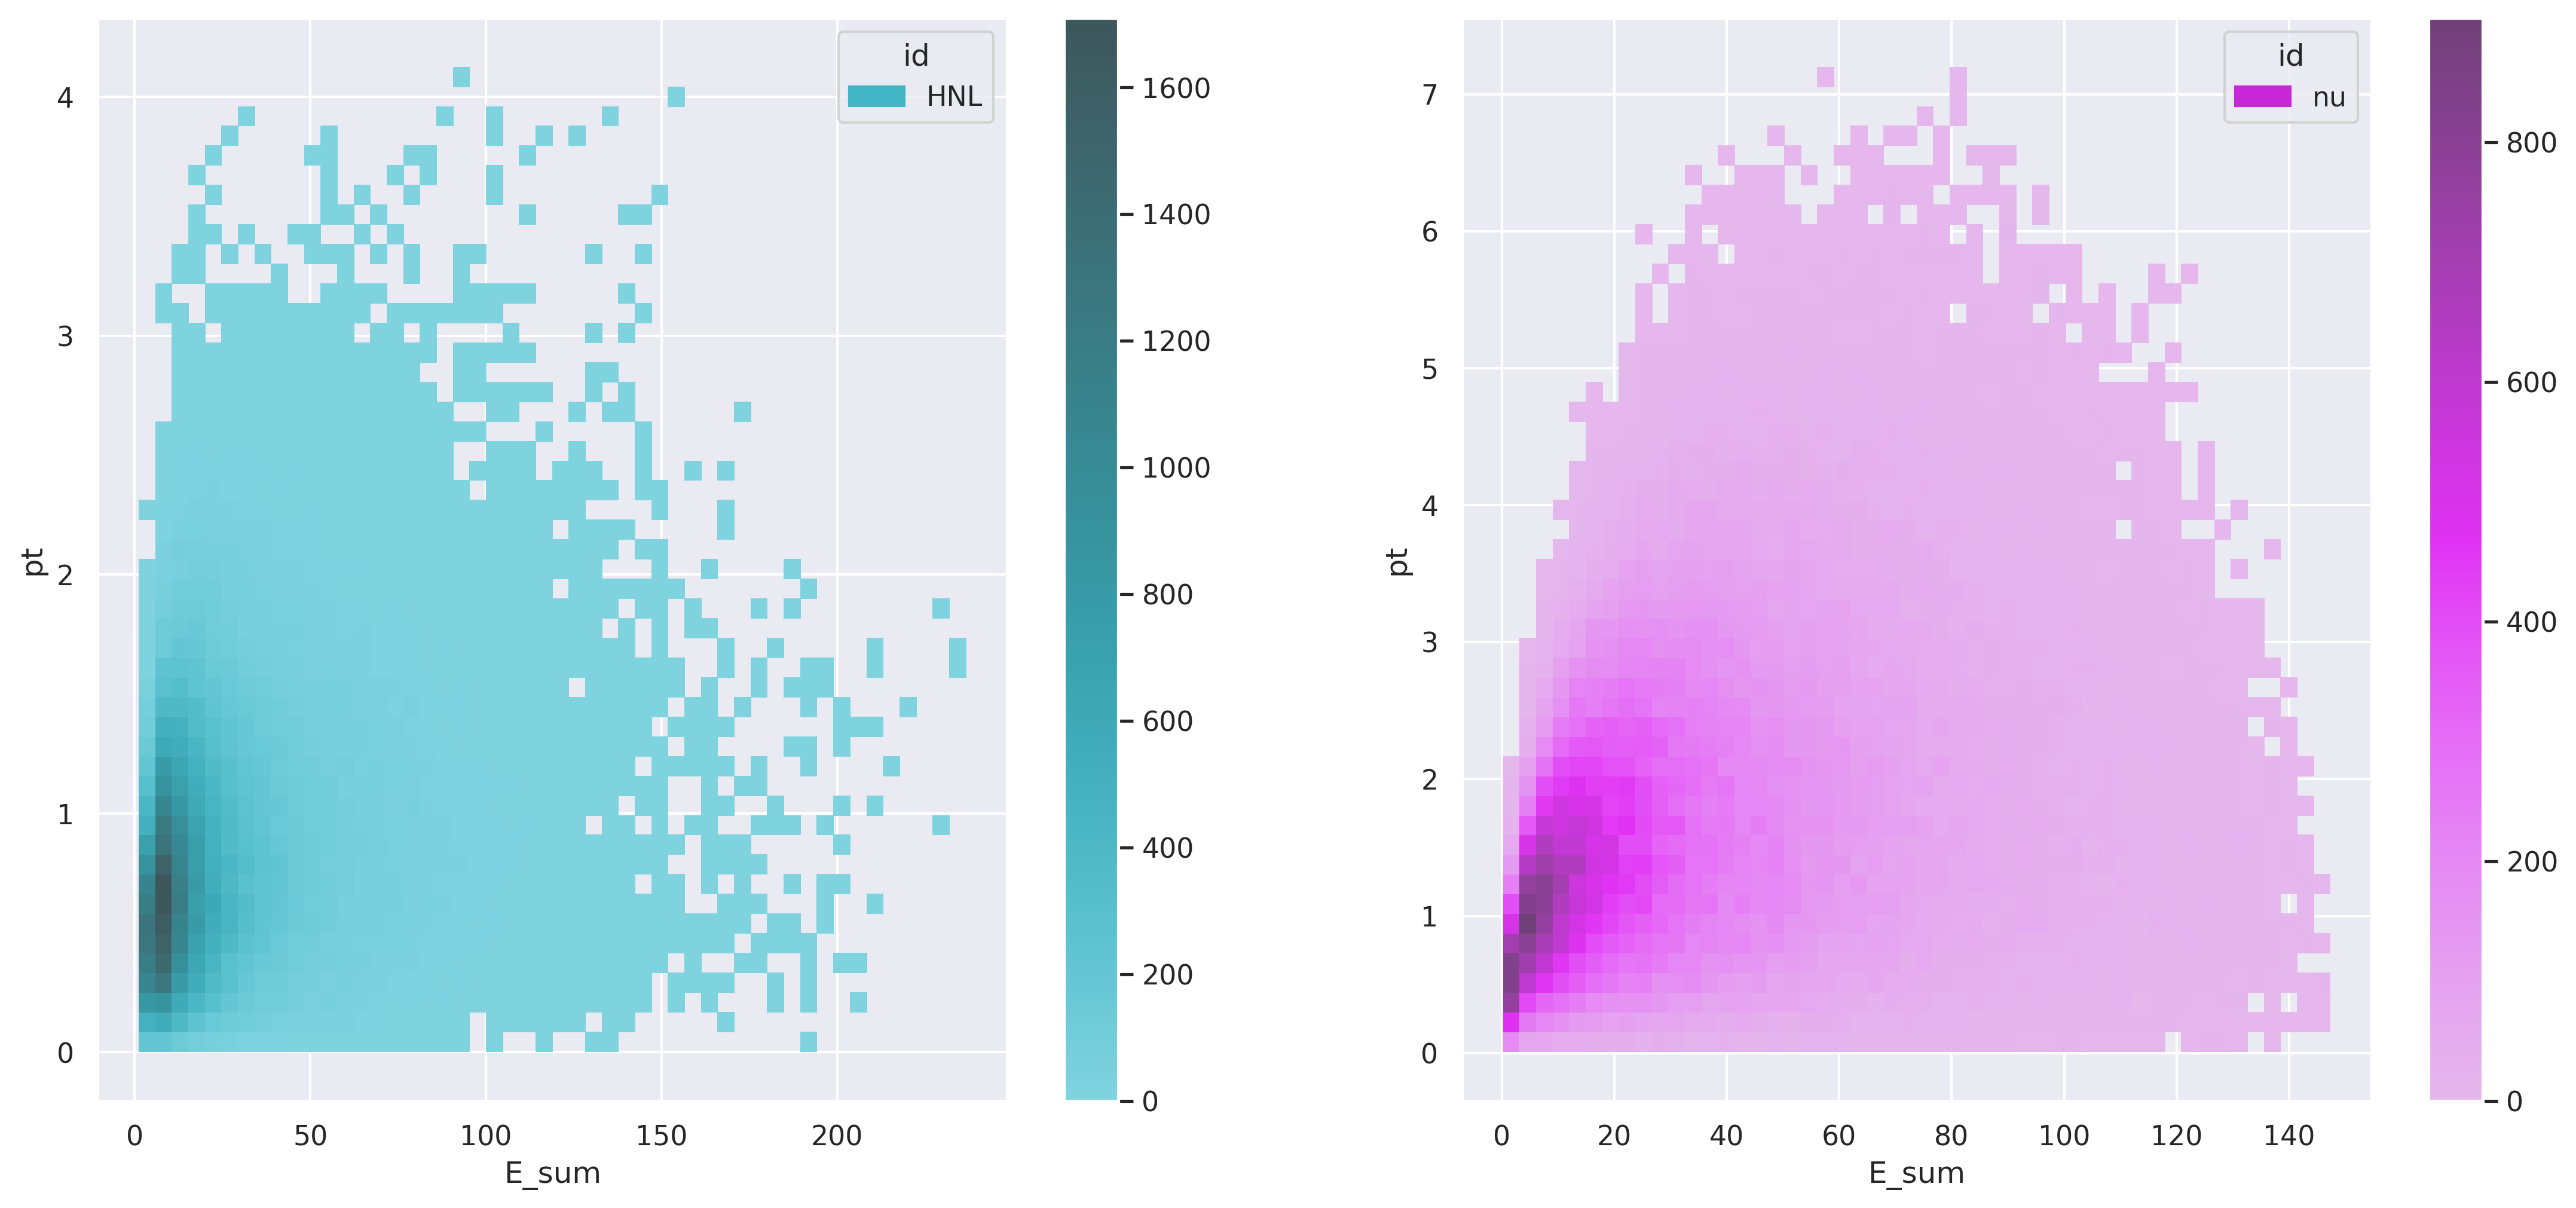

In [27]:
#%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
#plt.figure(figsize = (100,80))
#sns.set(rc={'figure.figsize':(36,24)})
#DATA_labeled = pd.concat([DATA, Dataset["id"]])
fig, ax = plt.subplots(1,2, figsize=(18,8), dpi = 300)
#plt.figure(figsize = (12,8))
#plt.grid()
palette = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red']
color = sns.color_palette("rocket", as_cmap=True)
sns.histplot(DATA.loc[DATA.id == 'HNL'], x="E_sum", y="pt", hue="id", ax = ax[0], 
             palette= 'YlGnBu_r', cbar=True, bins = 50)
sns.histplot(DATA.loc[DATA.id == 'nu'], x="E_sum", y="pt", hue="id", ax = ax[1], 
             palette = 'gnuplot2_r', cbar=True, bins = 50)
plt.savefig('p_pt.png', dpi=300)
plt.show()

In [ ]:
plt.figure(figsize = (12,8))
plt.grid()
plt.hist(get_inv_M2(Dataset.loc[Dataset.id == 'HNL']).to_numpy(), bins = 50, alpha = 0.5)
plt.hist(get_inv_M2(Dataset.loc[Dataset.id == 'nu']).to_numpy(), bins = 50, alpha = 0.5)
#plt.hist((Dataset.E_1 + Dataset.E_2).loc[Dataset.id == 'nu'].to_numpy(), bins = 50)
plt.xlabel("$M_{inv}^{2}$")
plt.show()